In [79]:
import numpy as np
from scipy.optimize import curve_fit

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### Filtering

In [23]:
with open('c1000_5.txt') as f:
    lines = f.readlines()

In [24]:
print('chunk size = 1000\n')
for l in lines:
    if 'Testing sample rate' in l:
        print(l.replace('\n', ''))
    if 'Total time' in l:
        print(l.replace('\n', ''))

chunk size = 10000

Total time: 122.99 s.
Total time: 123.79 s.
Total time: 116.04 s.
Total time: 129.48 s.
Total time: 139.59 s.
Total time: 160.38 s.
Total time: 152.61 s.
Total time: 144.97 s.
Total time: 111.86 s.
Total time: 146.92 s.


In [23]:
with open('c10000_5.txt') as f:
    lines = f.readlines()

In [24]:
print('chunk size = 10000\n')
for l in lines:
    if 'Total time' in l:
        print(l.replace('\n', ''))

chunk size = 10000

Total time: 122.99 s.
Total time: 123.79 s.
Total time: 116.04 s.
Total time: 129.48 s.
Total time: 139.59 s.
Total time: 160.38 s.
Total time: 152.61 s.
Total time: 144.97 s.
Total time: 111.86 s.
Total time: 146.92 s.


### Time by Rate (chunk = 1000)

In [156]:
def extracting(filepath):
    x = []
    y = []
    with open(filepath) as f:
        for l in f.readlines():
            if 'Testing' in l:
                x.append(float(l.split(' ')[4]))
            if 'Total time' in l:
                y.append(float(l.split(' ')[2]))
    return np.array(x), np.array(y)

In [157]:
c1kx, c1ky1 = extracting('c1000_1.txt')
_, c1ky2 = extracting('c1000_2.txt')
_, c1ky3 = extracting('c1000_3.txt')
_, c1ky4 = extracting('c1000_4.txt')
_, c1ky5 = extracting('c1000_5.txt')

In [159]:
c1kx

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [158]:
c1ky = (c1ky1 + c1ky2 + c1ky3 + c1ky4 + c1ky5) / 5
c1ky

array([0.686, 1.008, 0.934, 1.564, 2.504, 3.598, 2.246, 0.878, 0.93 ,
       1.142])

In [168]:
def gauss_func(x, a, mu, sigma):
    return a * np.exp(-(x-mu)**2 / (2 * sigma**2))

In [174]:
popt, pcov = curve_fit(gauss_func, c1kx, c1ky, p0=(1, 0.6, 0.1))

In [175]:
fitx = np.arange(0, 1, 0.01)
fity = gauss_func(fitx, *popt)

### Sample rate doesn't affect running time very much. The effection is unpredictable.

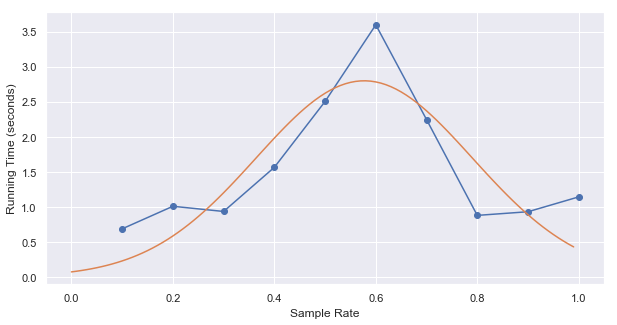

In [177]:
plt.figure(figsize=(10,5))
plt.plot(c1kx, c1ky, marker='o')
plt.plot(fitx, fity)
plt.xlabel('Sample Rate')
plt.ylabel('Running Time (seconds)')
plt.show()

### Time by Rate (chunk = 10000)

In [178]:
def extracting(filepath):
    x = []
    y = []
    with open(filepath) as f:
        for l in f.readlines():
            if 'Testing' in l:
                x.append(float(l.split(' ')[4]))
            if 'Total time' in l:
                y.append(float(l.split(' ')[2]))
    return np.array(x), np.array(y)

In [185]:
_, c1ky1 = extracting('c10000_1.txt')
_, c1ky2 = extracting('c10000_2.txt')
_, c1ky3 = extracting('c10000_3.txt')
_, c1ky4 = extracting('c10000_4.txt')
_, c1ky5 = extracting('c10000_5.txt')

In [187]:
c1kx = np.arange(0, 1, 0.1)
c1kx

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [188]:
c1ky = (c1ky1 + c1ky2 + c1ky3 + c1ky4 + c1ky5) / 5
c1ky

array([119.416, 121.714, 127.328, 132.166, 133.06 , 139.522, 152.034,
       138.806, 112.484, 146.272])

In [189]:
def gauss_func(x, a, mu, sigma):
    return a * np.exp(-(x-mu)**2 / (2 * sigma**2))

In [190]:
popt, pcov = curve_fit(gauss_func, c1kx, c1ky, p0=(1, 0.6, 0.1))

In [191]:
fitx = np.arange(0, 1, 0.01)
fity = gauss_func(fitx, *popt)

### Sample rate doesn't affect running time very much. The effection is unpredictable.

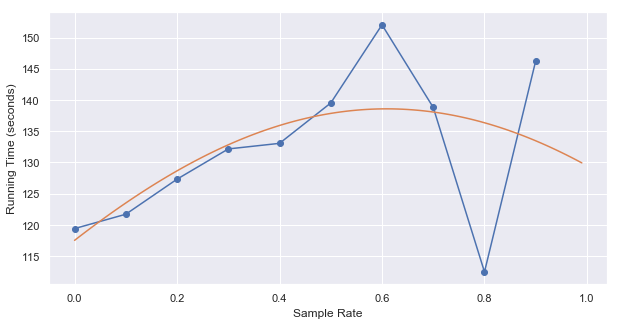

In [192]:
plt.figure(figsize=(10,5))
plt.plot(c1kx, c1ky, marker='o')
plt.plot(fitx, fity)
plt.xlabel('Sample Rate')
plt.ylabel('Running Time (seconds)')
plt.show()

### Time by Chunk (rate = 1)

In [48]:
def extracting(filepath):
    x = []
    y = []
    with open(filepath) as f:
        for l in f.readlines():
            if 'Testing' in l:
                x.append(int(l.split(' ')[4]))
            if 'Total time' in l:
                y.append(float(l.split(' ')[2]))
    return x, y

In [51]:
r1x, r1y = extracting('r1.txt')

In [52]:
r1x

[1000, 3000, 6000, 10000, 30000, 60000, 100000]

In [53]:
r1y

[0.96, 9.85, 33.89, 146.76, 1607.02, 7918.3, 24574.62]

In [162]:
# logarithmic exp_function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [163]:
popt, pcov = curve_fit(exp_func, r1x, r1y, p0=(1, 1e-6, 1))

In [164]:
fitx = np.arange(0, 200000, 1)
fity = exp_func(fitx, *popt)

### Chunk size affect running time very much. Running time is exponential to the chunk size.

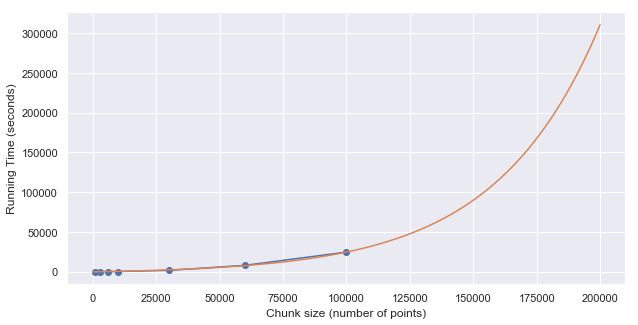

In [165]:
plt.figure(figsize=(10,5))
plt.plot(r1x, r1y, marker='o')
plt.plot(fitx, fity)
plt.xlabel('Chunk size (number of points)')
plt.ylabel('Running Time (seconds)')
plt.show()

With 100,000 points, the interpolation will take 6.84 hours.

In [122]:
t100000 = exp_func(100000, *popt) / 3600
t100000

6.838195268411186

With 500,000 points, the interpolation will take 14.93 years.

In [130]:
t500000 = exp_func(500000, *popt) / 3600 / 24 / 365.24
t500000

14.93048626024035

With 1,000,000 points, the interpolation will take 29459.25 centuries.

In [135]:
t1000000 = exp_func(1000000, *popt) / 3600 / 24 / 365.24 / 100
t1000000

29459.250689310476

With 2,433,528 points, the interpolation will take 3.24 billion Hubble time.

In [139]:
t1000000 = exp_func(2433528, *popt) / 3600 / 24 / 365.24 / 13.8 / 100000000000 / 1000000000
t1000000

3.2420557821686544

### Image of Interpolation Result

<img src="Figure_1.png">